## Final Assignment


Before working on this assignment please read these instructions fully. Use blackboard to submit a link to your repository. 

On blackboard your find the assessment criteria. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find at least two datasets on the web which are related, and that you build an application that visualize these datasets to answer a research question with the broad topic of **health** or **agriculture** in the **region where you were born**. The region can be a city, town or a provence.  

The research question should be a question with a causual nature. For instance questions like: How does independent variable X influence the dependent variable of Y?

The code should be programmed efficiently. Also identify the most critical part and write software test for this part. Take into account the performance of the dataprocessing

### About the data

You can merge these datasets with data from different regions if you like. For instance, you might want to compare the health effect of earhtquacks in Groningen versus Los Angelos USA. 

You are welcome to choose datasets at your discretion, but keep in mind they will be shared with others, so choose appropriate datasets. You are welcome to use datasets of your own as well, but minimual two datasets should be coming from the web and or API's. 

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations in your visualization. 

### Instructions:

Define a research question, select data and code your data acquisition, data processing, data analysis and visualization. Write code to test most critical parts. Use a repository with a commit strategy and write a readme file. 

Write a small document with the following:
- State the region and the domain category that your data sets are about 
- State the research question 
- Justify the chosen data storage and processing approach
- Justify the chosen analysis approach
- Justify the chosen data visualization approach

Upload your document and the link of your repository to black board

## loading in the datafiles and taking a first look

In [1]:
import pandas as pd
import numpy as np
from bokeh.models import (Band, ColumnDataSource, HoverTool, Span, 
                          LinearColorMapper, PrintfTickFormatter, BasicTicker, ColorBar)
from bokeh.models.widgets import DataTable, DateFormatter, TableColumn, HTMLTemplateFormatter
from bokeh.plotting import figure, show, output_file
from bokeh.models.widgets import Panel, Tabs
from bokeh.transform import transform
from bokeh.palettes import Inferno
from collections import OrderedDict
from bokeh.io import output_notebook
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import json
import pandas as pd
pd.options.mode.chained_assignment = None

def load_in(path_sewage, path_cases):
    sewage = pd.read_json(path_sewage, orient= "levels")
    cases = pd.read_json(path_cases, orient= "levels")
    sewage.head()
    cases.head()

    return sewage, cases

df_sewage, df_cases = load_in("Data/COVID-19_rioolwaterdata.json", 
                              "Data/COVID-19_aantallen_gemeente_cumulatief.json")

## Filtering
For the filtering of the data the columns that are uneccesary for this research will be removed.
Next there will be a check for missing data
For the sewage data there will be looked at which measure points have been used 
throughout and the ones that have been added later.The measure points added later will be removed.

Both datasets will be filtered on date. For an acurate date the sewage dataset is used. This is done
by checking when they started wit measuring the RNA flow per 10.000 inhibitants instead of RNA per ml.
This is done because it nearly impossible to calculate the RNA flow from the RNA per ml.
The end date is the same as the end date of the last entry in the sewage dataset.

Because of the many different measurepoints the RNA flow per 10.000 will be summed per province.
This will also be done for the total amount of corona cases.



#### sewage dataset

In [3]:
# deleting uneccesary columns:

df_sewage = df_sewage.drop(["RWZI_AWZI_code", "RWZI_AWZI_name", "X_coordinate", "Y_coordinate",
                           "Postal_code", "Security_region_code", "RNA_per_ml"], axis = 1)

# check unique values in the columns percentage_in_security_regrion and Representative_measurement to check 
# if there are any differences:

print(df_sewage['Percentage_in_security_region'].nunique())

print(df_sewage['Representative_measurement'].nunique())
# with this we can remove the representative column because all values are TRUE
df_sewage = df_sewage.drop(['Representative_measurement'], axis = 1)



119
1


In [4]:
import numpy as np
# check the number of unique values in the Security region name.
df_sewage['Security_region_name'].nunique()

# from this we can see that there are 26 regions measured. However there are only twelve provinces.
# We will check per region name in which province they belong and add them in an additional column.

df_sewage.Security_region_name.unique()
df_sewage["Province"] = np.nan

df_sewage.loc[(df_sewage.Security_region_name == "Midden- en West-Brabant")|
              (df_sewage.Security_region_name == "Brabant-Noord")| 
              (df_sewage.Security_region_name == "Brabant-Zuidoost"), 'Province'] = "Noord Brabant"
#df_sewage.loc[df_sewage.Security_region_name == "Brabant-Noord", 'Province'] = "Noord Brabant"
#df_sewage.loc[df_sewage.Security_region_name == "Brabant-Zuidoost", 'Province'] = "Noord Brabant"

df_sewage.loc[(df_sewage.Security_region_name == "IJsselland")|
              (df_sewage.Security_region_name == "Ijsselland")|
              (df_sewage.Security_region_name == "Twente"), 'Province'] = "Overijssel"
# df_sewage.loc[df_sewage.Security_region_name == "Ijsselland", 'Province'] = "Overijssel"
# df_sewage.loc[df_sewage.Security_region_name == "Twente", 'Province'] = "Overijssel"

df_sewage.loc[(df_sewage.Security_region_name == "Gelderland-Midden")|
              (df_sewage.Security_region_name == "Gelderland-Zuid")|
              (df_sewage.Security_region_name == "Noord- en Oost-Gelderland"), 'Province'] = "Gelderland"
# df_sewage.loc[df_sewage.Security_region_name == "Gelderland-Zuid", 'Province'] = "Gelderland"
# df_sewage.loc[df_sewage.Security_region_name == "Noord- en Oost-Gelderland", 'Province'] = "Gelderland"

df_sewage.loc[(df_sewage.Security_region_name == "Kennemerland")|
              (df_sewage.Security_region_name == "Noord-Holland-Noord")|
              (df_sewage.Security_region_name == "Zaanstreek-Waterland")|
              (df_sewage.Security_region_name == "Amsterdam-Amstelland")|
              (df_sewage.Security_region_name == "Gooi en Vechtstreek"), 'Province'] = "Noord Holland"
# df_sewage.loc[df_sewage.Security_region_name == "Noord-Holland-Noord", 'Province'] = "Noord Holland"
# df_sewage.loc[df_sewage.Security_region_name == "Zaanstreek-Waterland", 'Province'] = "Noord Holland"
# df_sewage.loc[df_sewage.Security_region_name == "Amsterdam-Amstelland", 'Province'] = "Noord Holland"
# df_sewage.loc[df_sewage.Security_region_name == "Gooi en Vechtstreek", 'Province'] = "Noord Holland"

df_sewage.loc[(df_sewage.Security_region_name == "Hollands-Midden")|
              (df_sewage.Security_region_name == "Haaglanden")|
              (df_sewage.Security_region_name == "Rotterdam-Rijnmond")|
              (df_sewage.Security_region_name == "Zuid-Holland-Zuid"), 'Province'] = "Zuid Holland"
# df_sewage.loc[df_sewage.Security_region_name == "Haaglanden", 'Province'] = "Zuid Holland"
# df_sewage.loc[df_sewage.Security_region_name == "Rotterdam-Rijnmond", 'Province'] = "Zuid Holland"
# df_sewage.loc[df_sewage.Security_region_name == "Zuid-Holland-Zuid", 'Province'] = "Zuid Holland"

df_sewage.loc[(df_sewage.Security_region_name == "Limburg-Noord")|
              (df_sewage.Security_region_name == "Limburg-Zuid"), 'Province'] = "Limburg"
# df_sewage.loc[df_sewage.Security_region_name == "Limburg-Zuid", 'Province'] = "Limburg"

df_sewage.loc[df_sewage.Security_region_name == "Drenthe", 'Province'] = "Drenthe"
df_sewage.loc[df_sewage.Security_region_name == "Groningen", 'Province'] = "Groningen"
df_sewage.loc[df_sewage.Security_region_name == "Friesland", 'Province'] = "Friesland"
df_sewage.loc[df_sewage.Security_region_name == "Utrecht", 'Province'] = "Utrecht"
df_sewage.loc[df_sewage.Security_region_name == "Flevoland", 'Province'] = "Flevoland"
df_sewage.loc[df_sewage.Security_region_name == "Zeeland", 'Province'] = "Zeeland"

df_sewage.nunique()

# Lastly in the cases df there is both Fryslan and Friesland, Fryslan will be changed to Friesland
df_cases.Province = df_cases.Province.replace({"Fryslân": "Friesland"})

In [5]:
# remove the empty entries for the RNA column
df_sewage = df_sewage.replace(r'^\s*$', np.nan, regex=True)
df_sewage.dropna(subset = ["RNA_flow_per_100000"], inplace=True)

#checking data types of the sewage dataframe
print(df_sewage.dtypes)
# the datatypes for the date should be changed, 
#furthermore the datatype of the percentage and the RNA column should be changed
df_sewage['Date_measurement'] = df_sewage['Date_measurement'].astype('datetime64[ns]')
df_sewage['RNA_flow_per_100000'] = df_sewage['RNA_flow_per_100000'].astype('int64')

#df_sewage["Percentage_in_security_region"].replace({",": "."}, inplace=True)
#df_sewage['Percentage_in_security_region'] = df_sewage['Percentage_in_security_region'].astype('float')

df_sewage.head()

Date_measurement                 object
Security_region_name             object
Percentage_in_security_region    object
RNA_flow_per_100000              object
Province                         object
dtype: object


,Date_measurement,Security_region_name,Percentage_in_security_region,RNA_flow_per_100000,Province
1266,2020-09-07,IJsselland,1,0,Overijssel
1267,2020-09-07,Limburg-Zuid,1,0,Limburg
1268,2020-09-07,Limburg-Noord,1,0,Limburg
1269,2020-09-07,Utrecht,1,0,Utrecht
1270,2020-09-07,Haaglanden,"0,841309046",0,Zuid Holland


### The Cases dataset is from 13th of March 2020 to the first of February 2021. However the sewage dataset is only from the 7th of September 2020 to the 27th of January 2021.
#### To work with both datsets and being able to compare them all dates out of the sewage dates will be removed from the cases dataet. This way it will be more logical to compare the two together.

In [6]:
df_cases['Date_of_report'] =pd.to_datetime(df_cases.Date_of_report)
#df_cases.dtypes

start_date = pd.to_datetime('2020/09/07')
end_date = pd.to_datetime('2021/01/28')
mask = (df_cases['Date_of_report'] > start_date) & (df_cases['Date_of_report'] <= end_date)
df_cases = df_cases.loc[mask]

In [7]:
# furthermore the columns with useless values (for this research) will be removed
df_cases = df_cases.drop(["Municipality_code", "Municipality_name"], axis = 1)
df_cases.head()

,Date_of_report,Province,Total_reported,Hospital_admission,Deceased
65326,2020-09-07 10:00:00,Groningen,7,3,0
65327,2020-09-07 10:00:00,Groningen,63,6,0
65328,2020-09-07 10:00:00,Groningen,335,18,3
65329,2020-09-07 10:00:00,Groningen,2,0,0
65330,2020-09-07 10:00:00,Flevoland,817,132,33


In [8]:
df_cases = df_cases.rename(columns={'Date_of_report': 'Date_measurement'})

## Data comparison
#### Now that both datasets have been cleaned an filtered, we can take a closer look to the data itself
Because the data is so extensive we will first take a closer look at two provinces (Groningen and Friesland). 
We will then graph the cases of Groningen to the cases of Friesland.
Furthermore we will graph the cases compared to the amount of virus particles in the sewage water.

#### Looking at all the provinces

In [9]:
# Remove the time stamp on the date_measurements column in the cases for easier use throughout the research
df_cases['Date_measurement'] = pd.to_datetime(df_cases['Date_measurement']).dt.date
df_cases['Date_measurement'] =pd.to_datetime(df_cases.Date_measurement)


In [10]:
df_cases['Province'].unique()

array(['Groningen', 'Flevoland', 'Friesland', 'Drenthe', 'Overijssel',
       'Gelderland', 'Utrecht', 'Noord-Holland', 'Zuid-Holland',
       'Zeeland', 'Noord-Brabant', 'Limburg'], dtype=object)

In [11]:
# for easier comparison between the provinces for each date and province the total sum will be taken
cases = df_cases.groupby(by=(['Date_measurement', 'Province'])).agg({'Total_reported': 'sum',
                                                                   'Hospital_admission': 'sum',
                                                                    'Deceased' : 'sum'
                                                                   }).reset_index()
sewage = df_sewage.groupby(by=(['Date_measurement', 'Province'])).agg({'RNA_flow_per_100000': 'sum'}).reset_index()

In [12]:
sewage.head()

,Date_measurement,Province,RNA_flow_per_100000
0,2020-01-25,Noord Brabant,7481744116612
1,2020-09-07,Gelderland,2206509031616
2,2020-09-07,Groningen,8344858763141
3,2020-09-07,Limburg,4173341445197
4,2020-09-07,Noord Brabant,25795176368127


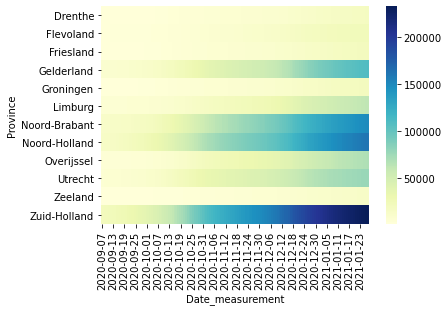

In [13]:
# create a heatmap of the cases dataset

cases['Date_measurement'] = cases.Date_measurement.astype('string')
# pandas pivot
heatmap1_data = pd.pivot_table(cases, values='Total_reported', 
                     index=['Province'], 
                     columns='Date_measurement')

#heatmap
heatmap = sns.heatmap(heatmap1_data, cmap="YlGnBu")
plt.show()

#### In the heatmap above you can see that for most provinces the total number of cases gradually goes up. We can now also see that the cases are mostly seen in three 4 provinces, Gelderland, Noord-Brabant, Noord-Holland and Zuid-Holland. For a bit more explanation we quickly looked up the amount of people living in these provinces and if these are also the provinces with the most people:
Groningen	    582.649
Friesland 	    646.092
Drenthe		    488.871
Overijssel	    1.142.360
Flevoland	    403.280
Gelderland	    2.031.123
Utrecht	        1.268.489
Noord-Holland	2.775.617
Zuid-Holland	3.607.150
Zeeland         381.182
Noord-Brabant	2.495.107
Limburg	        1.115.805
#### Looking at this we can indeed see that these are the provinces with at least 2 milion inhabitants per province.

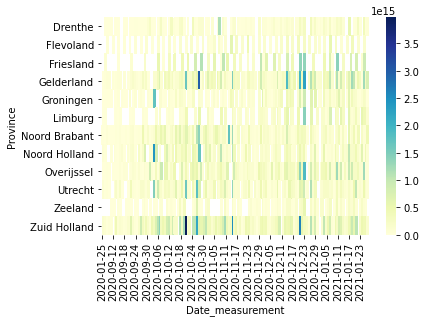

In [14]:
# create a heatmap of the sewage dataset

sewage['Date_measurement'] = sewage.Date_measurement.astype('string')
# pandas pivot
heatmap1_data = pd.pivot_table(sewage, values='RNA_flow_per_100000', 
                     index=['Province'], 
                     columns='Date_measurement')
#heatmap
heatmap = sns.heatmap(heatmap1_data, cmap="YlGnBu")
plt.show()

#### From this heatmap we can already kinda conclude that the RNA particles in the sewage data do not seem like an accurate representation of the amount of corona cases in the netherlands.
#### For further analyzation between the provices we will not look at the sewage data and focus on the total cases.

In [42]:
NH

,Date_measurement,Province,Total_reported,Hospital_admission,Deceased
7,2020-09-07,Noord-Holland,13788,1726,832
19,2020-09-08,Noord-Holland,14092,1729,832
31,2020-09-09,Noord-Holland,14359,1729,832
43,2020-09-10,Noord-Holland,14581,1738,832
55,2020-09-11,Noord-Holland,14888,1743,834
...,...,...,...,...,...
1663,2021-01-23,Noord-Holland,159590,3369,1935
1675,2021-01-24,Noord-Holland,160373,3377,1937
1687,2021-01-25,Noord-Holland,160931,3388,1945
1699,2021-01-26,Noord-Holland,161760,3400,1958


KruskalResult(statistic=1714.9999999999995, pvalue=0.0)


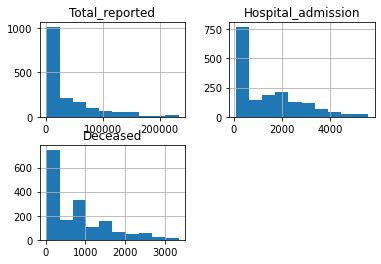

In [46]:
from scipy import stats

# Lets take a look at the normalization of the total amount of corona cases
cases.hist()
# none of the three columns is normally distributed but follows a more chi square distribution
# to do a statistical test where we can test multiple different aspects like we would normally use the ANOVA
# we will have to look for an alternative for non parametric data.
# We will execute the Kruskal-Wallis H-test as an alternative option for the ANOVE on non parametric data.
NB = cases[(cases['Province'] == 'Noord-Brabant')]
O = cases[(cases['Province'] == 'Overijssel')]
Gl = cases[(cases['Province'] == 'Gelderland')]
NH = cases[(cases['Province'] == 'Noord-Holland')]
ZH = cases[(cases['Province'] == 'Zuid-Holland')]
L = cases[(cases['Province'] == 'Limburg')]
D = cases[(cases['Province'] == 'Drenthe')]
G = cases[(cases['Province'] == 'Groningen')]
F = cases[(cases['Province'] == 'Friesland')]
U = cases[(cases['Province'] == 'Utrecht')]
Fl = cases[(cases['Province'] == 'Flevoland')]
Z = cases[(cases['Province'] == 'Zeeland')]


result = stats.kruskal(NB.Province, O.Province, Gl.Province, NH.Province, ZH.Province, 
              L.Province, D.Province, G.Province, F.Province, U.Province, Fl.Province, Z.Province)

print(result)


#### Zooming in on Groningen en Friesland

In [16]:
# first lets create a simple graph visualizing the data in lines, to see if they follow the same curvation
cases_g = df_cases[(df_cases['Province'] == 'Groningen')]
cases_f = df_cases[(df_cases['Province'] == 'Friesland')]
sewage_g = df_sewage[(df_sewage['Province'] == 'Groningen')]
sewage_f = df_sewage[(df_sewage['Province'] == 'Friesland')]

In [17]:
cases_g_sum = cases_g.groupby(by='Date_measurement').agg({'Total_reported': 'sum'})

cases_f_sum = cases_f.groupby(by='Date_measurement').agg({'Total_reported': 'sum'})

sewage_g_sum = sewage_g.groupby(by='Date_measurement').agg({'RNA_flow_per_100000': 'sum'})

sewage_f_sum = sewage_f.groupby(by='Date_measurement').agg({'RNA_flow_per_100000': 'sum'})

In [18]:
# checking all the datapoints I noticed that the data starts with 09-07 for the Groningen datapoint
# but for the sewage data on Friesland it started on the 09-08
# This should not cause to many problems for now, so we are keeping the data as it is for now.
sewage_f_sum.head(5)

,RNA_flow_per_100000
Date_measurement,
2020-09-08,83680804596726
2020-09-15,42049447262665
2020-09-22,96108538420255
2020-09-29,188207079567760
2020-10-06,534779001494232


The next step is normalizing the data, this way it is easier to graph both datasets at the same time.

In [19]:
# from sklearn import preprocessing

# def normalize(data):
#     """
#     Normalizes the data to a scale of 1. This is done to be able to better graph the two datasets
#     together later on in this project.
#     """
def normalize(df):
    """
    Normalizes the data to a scale of 1. This is done to be able to better graph the two datasets
    together later on in this project.
    """
    return (df - df.min()) * 1.0 / (df.max() - df.min())

norm_sf = normalize(sewage_f_sum)
norm_sg = normalize(sewage_g_sum)

norm_cf = normalize(cases_f_sum)
norm_cg = normalize(cases_f_sum)

# put the dates in as regular columns again
def reset_ind (df):
    df.reset_index(level=0, inplace=True)
    return df

norm_sf = reset_ind(norm_sf)
norm_sg = reset_ind(norm_sg)

norm_cf = reset_ind(norm_cf)
norm_cg = reset_ind(norm_cg)

In [20]:
# # next the normalized datasets will be combined into two datasets based on Province

df_F = pd.merge(norm_cf, norm_sf, on="Date_measurement", how='outer')
df_G = pd.merge(norm_cg, norm_sg, on="Date_measurement", how='outer')

In [21]:
def plot(df, title):
    p = figure(width=500, plot_height=500, title=title,
           x_axis_type="datetime", x_axis_label='Date', y_axis_label="normalized value")
    p.line(df['Date_measurement'], df['Total_reported'], line_width =2, color="navy", 
        alpha=0.5, legend_label="Total reported cases")
    p.square(df['Date_measurement'], df['RNA_flow_per_100000'], line_width =2, color="hotpink", 
        alpha=0.5, legend_label="RNA particles sewage")  
    
    p.legend.location = "top_left"
    p.legend.click_policy="hide"
    
    return p

show(plot(df_F, "Corona Friesland"))
show(plot(df_G, "Corona Groningen"))

From the plots above we can't really draw any conclusions. Looking at the first plot we don't neccesarily see that the total amount of corona cases correlates with the RNA particles found in the sewage. When looking at the dataset from Groningen we can see that it sort of looks like the amount of virus particles found in the sewage is going up, but again it is not really clear when looking at the graph.

We need a better way of finding a correlation between the total reported cases and the RNA particles in the sewage. We can take a quick look at the correlation value between the two.

In [22]:
corr = df_F.corr()
print("correlation between total cases and RNA flow per 100000 in sewage in the province Friesland")
corr.style.background_gradient(cmap='coolwarm')

correlation between total cases and RNA flow per 100000 in sewage in the province Friesland


,Total_reported,RNA_flow_per_100000
Total_reported,1.000000,0.327299
RNA_flow_per_100000,0.327299,1.000000


In [23]:
corr = df_G.corr()
print("correlation between total cases and RNA flow per 100000 in sewage in the province Groningen")
corr.style.background_gradient(cmap='coolwarm')

correlation between total cases and RNA flow per 100000 in sewage in the province Groningen


,Total_reported,RNA_flow_per_100000
Total_reported,1.000000,0.217100
RNA_flow_per_100000,0.217100,1.000000


We can see in the correlations above that the dataset from Friesland seems to have a slightly higher correlation but both provinces do not have a strong correlation with one another.

To further analyze, we should first look if the datasets are both normally distributed

array([[<AxesSubplot:title={'center':'Total_reported'}>,
        <AxesSubplot:title={'center':'RNA_flow_per_100000'}>]],
      dtype=object)

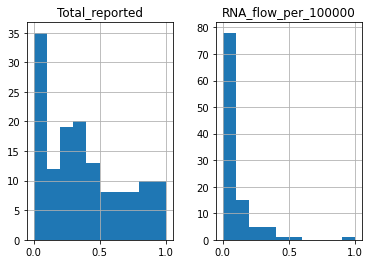

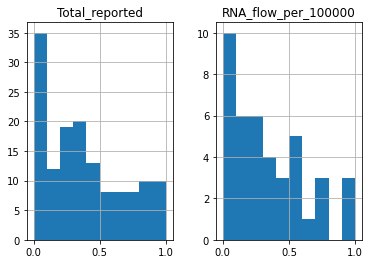

In [24]:
df_G.hist()
df_F.hist()

### Neither dataset is normally distributed. Lastly we will perform an statistical test comparing the total cases of Groningen and Friesland, and the RNA particles in sewage of Groningen and Friesland.For this we can choose between three statistical tests: 
#### The Mann-Whitney U test for comparing independent data samples: the nonparametric version of the Student t-test.
#### The Wilcoxon signed-rank test for comparing paired data samples: the nonparametric version of the paired Student t-test.
#### The Kruskal-Wallis H and Friedman tests for comparing more than two data samples: the nonparametric version of the ANOVA and repeated measures ANOVA tests.

We chose the Mann-Whitney U test because we are comparing two groups of independent data samples. which as shown in the histogram are non parametric

In [25]:
from scipy.stats import mannwhitneyu
# compare samples
stat, p = mannwhitneyu(df_G['Total_reported'], df_F['Total_reported'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')
    
"""
As we could already see in the histogram the distribution of the two were almost the same. 
From this we can conclude that both Groningen as Friesland followed the same distribution when it comes to 
the total amount of corona cases.
""" 

Statistics=10224.500, p=0.500
Same distribution (fail to reject H0)


'\nAs we could already see in the histogram the distribution of the two were almost the same. \nFrom this we can conclude that both Groningen as Friesland followed the same distribution when it comes to \nthe total amount of corona cases.\n'

In [26]:
from scipy.stats import mannwhitneyu
# compare samples
stat, p = mannwhitneyu(df_G['RNA_flow_per_100000'], df_F['RNA_flow_per_100000'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')
    
"""
When it comes to the distribution of the RNA corona particles in the sewage the distribution is not the same.
In the histogram you can already see this a little bit, but it is not really clear if this is really the case.
From this we can conclude that Groningen and Friesland follow a different distribution when it comes to
the amount of virus particles in the sewage water.
""" 

Statistics=4525.000, p=0.000
Different distribution (reject H0)


'\nWhen it comes to the distribution of the RNA corona particles in the sewage the distribution is not the same.\nIn the histogram you can already see this a little bit, but it is not really clear if this is really the case.\nFrom this we can conclude that Groningen and Friesland follow a different distribution when it comes to\nthe amount of virus particles in the sewage water.\n'

#### As an extra because the data was kinda dissapointing from my expectations I wanted to make a map with the corona cases. This code will be below here


In [48]:
import pandas as pd
import numpy as np
import urllib.request as rq
from bs4 import BeautifulSoup as bs
import geopandas as gpd
from shapely import geometry
import matplotlib.pyplot as plt
from shutil import copyfile
import subprocess
from IPython.display import Video

%matplotlib inline

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
## First fetch the parsing population data from wikipedia
wikipedia = 'https://en.wikipedia.org/wiki/'
wikipediapage = rq.urlopen(wikipedia + 'List_of_municipalities_of_the_Netherlands')
parsedpage = bs(wikipediapage, 'html.parser')
tables = parsedpage.find_all("table", attrs={"class": "wikitable plainrowheaders sortable"})
population_table = tables[0]
objlist = list()
for row in population_table.find_all('tr')[1:]:
   obj = dict()
   obj["Municipality_name"] = row.find_all('th')[0].find_all('a')[0].getText()
   if obj["Municipality_name"] == "The Hague":
      obj["Municipality_name"] = "'s-Gravenhage"
   if obj["Municipality_name"] == "Bergen (LI)":
      obj["Municipality_name"] = "Bergen (L.)"
   if obj["Municipality_name"] == "Bergen (NH)":
      obj["Municipality_name"] = "Bergen (NH.)"
   obj["population"] = int("".join(row.find_all('td')[2].getText().split(",")))
   objlist.append(obj)
wikipediadata = pd.DataFrame(objlist).set_index("Municipality_name")
df2 = pd.DataFrame([["min",1000000],["max",1000000]], 
                          columns=["Municipality_name","population"])
df2 = df2.set_index("Municipality_name")
wikipediadata = wikipediadata.append(df2)